# Predicting passenger flight satisfaction

# Setup

In [30]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFECV

In [2]:
!pip install flaml[automl]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 6.2 MB/s eta 0:00:00


In [3]:
if not hasattr(np, "NaN"):
  np.NaN = np.nan
from flaml import AutoML

In [4]:
# Download latest version
path = kagglehub.dataset_download("teejmahal20/airline-passenger-satisfaction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/airline-passenger-satisfaction


In [13]:
df = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/train.csv')
df.shape

(103904, 25)

# Data understanding

# Data profiling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

*'Arrival Delay in Minutes'* is the only column that has missing values.

# Feature semantics

## Context
This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can we predict passenger satisfaction?

## Content
*    Gender: Gender of the passengers (Female, Male)
*    Customer Type: The customer type (Loyal customer, disloyal customer)
*    Age: The actual age of the passengers
*    Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
*    Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
*    Flight distance: The flight distance of this journey
*    Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
*    Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
*    Ease of Online booking: Satisfaction level of online booking
*    Gate location: Satisfaction level of Gate location
*    Food and drink: Satisfaction level of Food and drink
*    Online boarding: Satisfaction level of online boarding
*    Seat comfort: Satisfaction level of Seat comfort
*    Inflight entertainment: Satisfaction level of inflight entertainment
*    On-board service: Satisfaction level of On-board service
*    Leg room service: Satisfaction level of Leg room service
*    Baggage handling: Satisfaction level of baggage handling
*    Check-in service: Satisfaction level of Check-in service
*    Inflight service: Satisfaction level of inflight service
*    Cleanliness: Satisfaction level of Cleanliness
*    Departure Delay in Minutes: Minutes delayed when departure
*    Arrival Delay in Minutes: Minutes delayed when Arrival
*    Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

# Data distribution

In [ ]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
df[:5]

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Data preprocessing: Drop the unnecessary columns
There are some features that we can drop, as they are not relevant for the goal:


*   Unnamed: 0
*   id   

In [14]:
df = df.drop(['Unnamed: 0', 'id'], axis=1)

# Data preprocessing: Visualization

Let's first see what categorical values we have.

In [ ]:
print(df.select_dtypes(include='object').nunique())

Gender            2
Customer Type     2
Type of Travel    2
Class             3
satisfaction      2
dtype: int64


In [15]:
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
for col in categorical_cols:
  print(f"{col}: {df[col].unique()}")

Gender: ['Male' 'Female']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Type of Travel: ['Personal Travel' 'Business travel']
Class: ['Eco Plus' 'Business' 'Eco']
satisfaction: ['neutral or dissatisfied' 'satisfied']


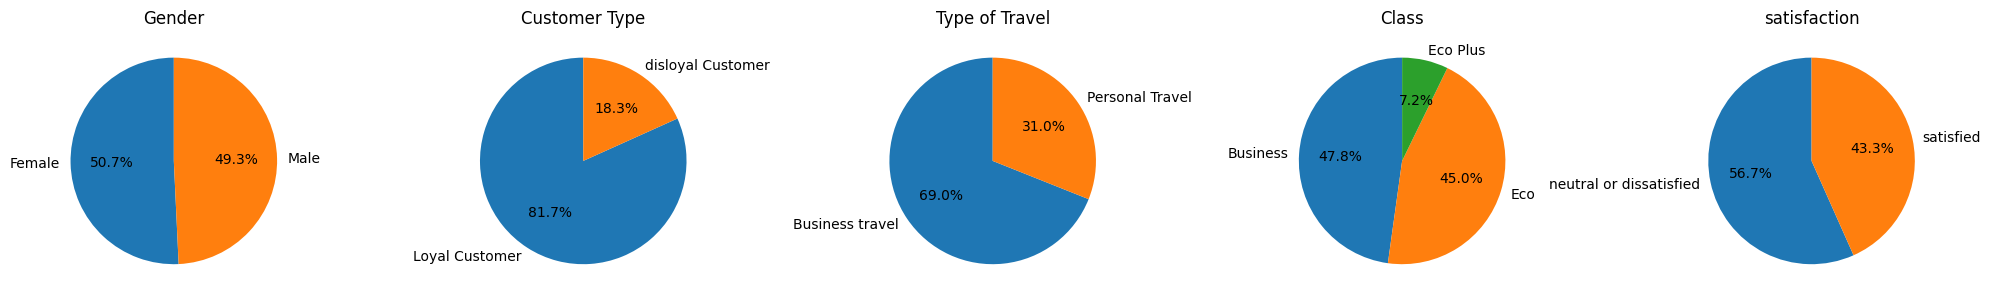

In [16]:
cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
fig, axes = plt.subplots(1, 5, figsize=(20, 20))

for i, col in enumerate(cols):
  df[col].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', ax=axes[i], startangle=90)
  axes[i].set_title(col)
  axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

From these plots we can see that:


*   The *'Gender'* classes are balanced.
*   Majority of the customers are loyal and travel for business purposes.
*   The most chosen classes are *'Business'* and *'Eco'*, which are also balanced.
*   The *'satisfaction'* classes are more or less balanced.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

# Checking correlations

<Axes: >

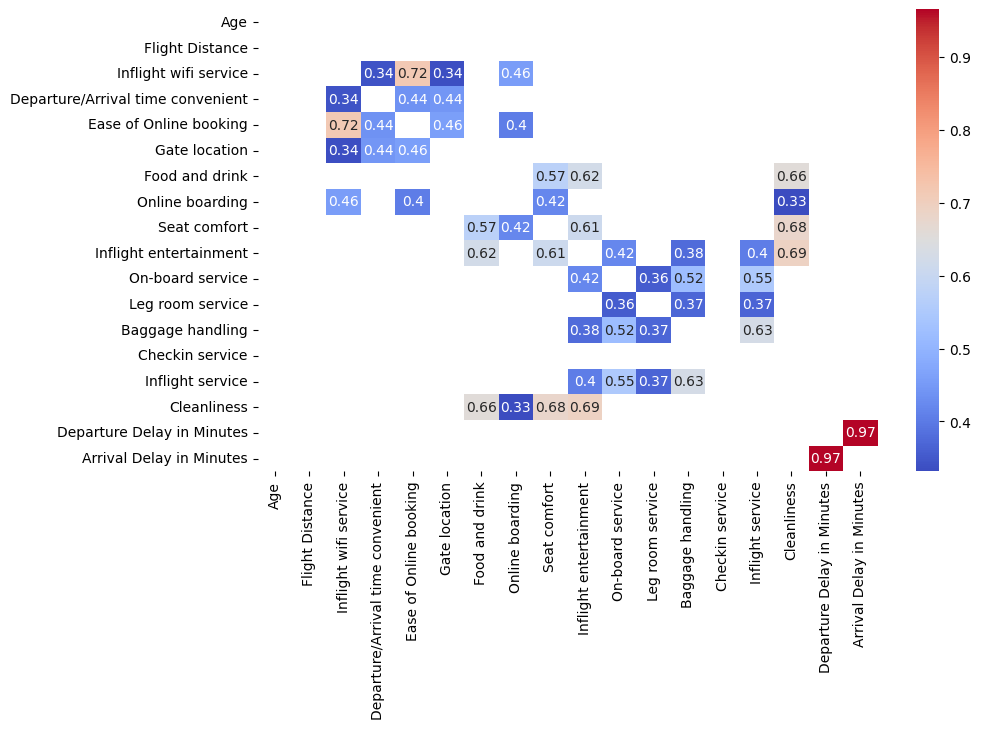

In [ ]:
correlation_mat = df.corr(method='pearson', numeric_only=True)
min_corr = 0.3
filtered_corr = correlation_mat[(abs(correlation_mat) >= min_corr) & (correlation_mat < 1)]

plt.figure(figsize=(10,6))
sns.heatmap(filtered_corr, cmap=sns.color_palette("coolwarm", as_cmap=True), annot=True)




*   There is a strong correlation between *'Departure Delay in Minutes'* and *'Arrival Delay in Minutes'*, so we can keep just one of them. We can also observe that these 2 features do not seem to be correlated to any other feature.
*   We can observe another slightly weaker correlation between *'Seat comfort'*, *'Inflight entertainment'*, *'Cleanliness'*, and *'Food and drink'*, but for now we will keep all of them since the correlation is not so strong.
*   Another correlation is between *'Ease of Online booking'* and *'Inflight wifi service'*, but from a logical point of view the two features do not depend on each other so we will keep both of them.
*   *'Age'* is not correlated with anything, we will analyze it later.
*   *'On-board service'* and *'Inflight service'* have almost the same correlations, which makes sense given that they take care of almost the same services. They are also correlated with *'Baggage handling'*.
*    There remain some attributes that we cannot infer any information about: *'Flight distance'*, *'Departure/Arrival time convenient'*, *'Gate location'*, *'Online boarding'*, *'Leg room service'*, and *'Check-in service'*.

Dropping *'Arrival Delay in Minutes'*, which also has some missing values.

In [17]:
df = df.drop(['Arrival Delay in Minutes'], axis=1)

# Data preprocessing: Encoding

Transforming *'Gender'*, *'Customer Type'*, and *'Type of Travel'* into boolean values.

In [18]:
df['Gender'] = df['Gender'].map({'Female': True, 'Male': False})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer': True, 'disloyal Customer': False})
df['Type of Travel'] = df['Type of Travel'].map({'Business travel': True, 'Personal Travel': False})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Gender                             103904 non-null  bool  
 1   Customer Type                      103904 non-null  bool  
 2   Age                                103904 non-null  int64 
 3   Type of Travel                     103904 non-null  bool  
 4   Class                              103904 non-null  object
 5   Flight Distance                    103904 non-null  int64 
 6   Inflight wifi service              103904 non-null  int64 
 7   Departure/Arrival time convenient  103904 non-null  int64 
 8   Ease of Online booking             103904 non-null  int64 
 9   Gate location                      103904 non-null  int64 
 10  Food and drink                     103904 non-null  int64 
 11  Online boarding                    103904 non-null  

We can also plot the proportions of some of the ordinal values we've seen before.

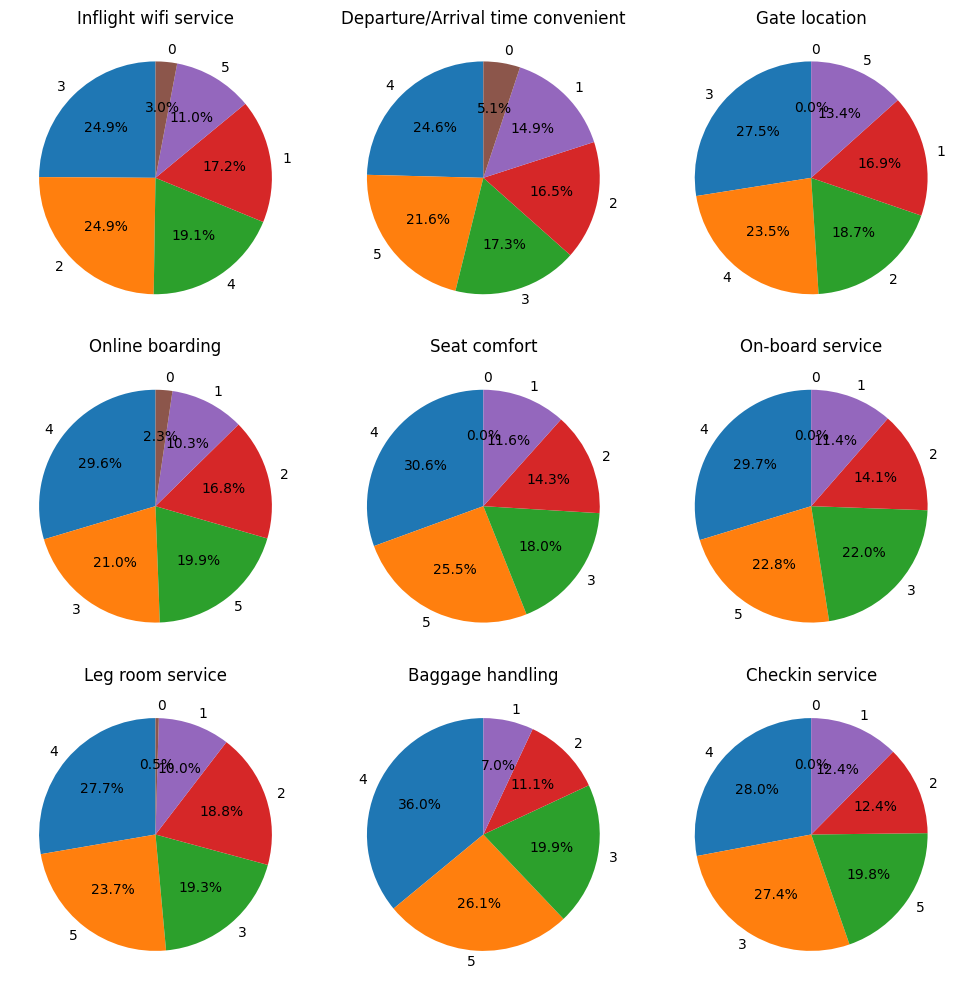

In [ ]:
cols = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Gate location', 'Online boarding', 'Seat comfort', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service']
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()
for i, col in enumerate(cols):
  df[col].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', ax=axes[i], startangle=90)
  axes[i].set_title(col)
  axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

From these plots we can conclude that:
*    Majority of passengers were satisfied with their seat (4 & 5 rates).
*    Majority of passengers were satisfied with the on-board service (4 & 5 rates).
*    Majority of passengers were satisfied by the leg room (4 & 5 rates).
*    Majority of passengers were satisfied with the baggage handling service (60%).

There is one feature, *'Age'*, that seemed like it was not correlated to any other feature, but which usually expresses some degree of information. Let's take a closer look.

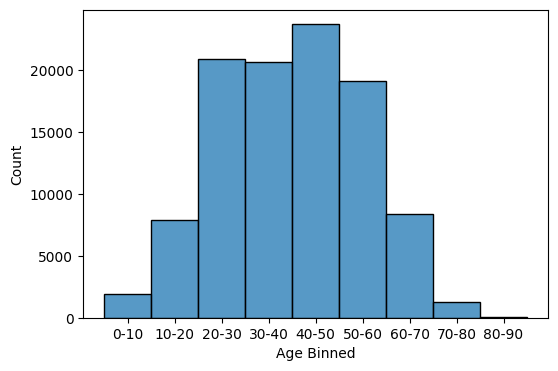

In [19]:
age_bins = range(0, 101, 10)
age_labels = [f'{i}-{i+10}' for i in age_bins[:-1]]

df['Age Binned'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age Binned')
plt.show()

Majority of customers are between 20-60 years old.

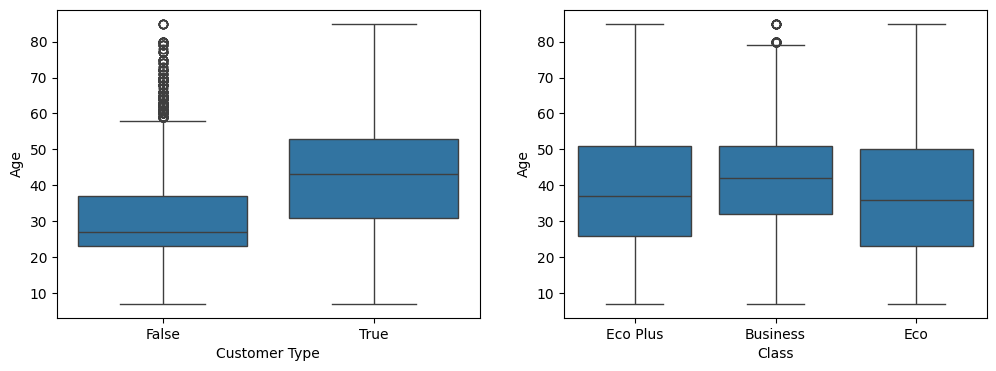

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.boxplot(x = "Customer Type", y = "Age", data = df, ax=axes[0])
sns.boxplot(x = "Class", y = "Age", data = df, ax=axes[1])
plt.show()

Most loyal customers are of ages between 30 and 55, with an average above 40. Most disloyal customers are of ages between 25 and 40, with an average of almost 30, and some outliers above 60.


As we've seen above, more than 90% of passengers chose to fly in Business or Eco class, almost equally. We can see from the box plots that the age box of Business Class is almost the same as the one of Loyal Customers, while the Eco Class includes younger customers and has a lower age average. So, we can conclude that the **loyal customers usualy fly in Business Class**, regardless of age.

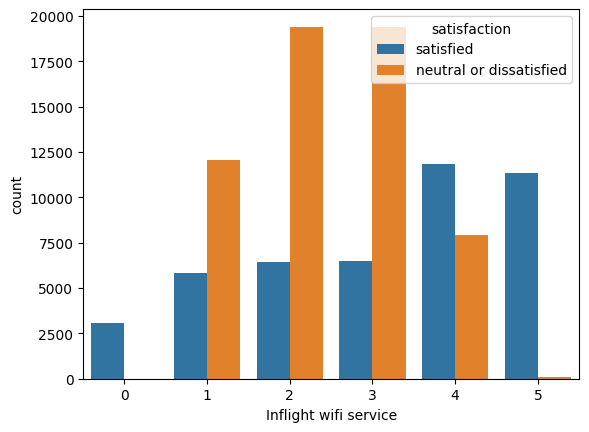

In [ ]:
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', data = df)
plt.show()

Passengers with 'perfect' wifi were almost all satisfied with the flight.

# Data preprocessing: Encoding
One-hot encoding for the *'Class'* feature.

In [20]:
df_encoded = pd.get_dummies(df['Class'], drop_first=False)
df = pd.concat([df.drop('Class', axis=1), df_encoded], axis=1)

In [21]:
df['satisfaction'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})
y = df['satisfaction']

In [ ]:
df[:5]

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Age Binned,Business,Eco,Eco Plus
0,False,True,13,False,460,3,4,3,1,5,...,4,4,5,5,25,0,10-20,False,False,True
1,False,False,25,True,235,3,2,3,3,1,...,3,1,4,1,1,0,20-30,True,False,False
2,True,True,26,True,1142,2,2,2,2,5,...,4,4,4,5,0,1,20-30,True,False,False
3,True,True,25,True,562,2,5,5,5,2,...,3,1,4,2,11,0,20-30,True,False,False
4,False,True,61,True,214,3,3,3,3,4,...,4,3,3,3,0,1,60-70,True,False,False


Normalization of quantitative features (manually).

In [ ]:
# cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
# numerical_df = df[cols]
# numerical_df = (numerical_df - numerical_df.mean(axis=0)) / numerical_df.std(axis=0)
# numerical_df.describe()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  bool    
 1   Customer Type                      103904 non-null  bool    
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  bool    
 4   Flight Distance                    103904 non-null  int64   
 5   Inflight wifi service              103904 non-null  int64   
 6   Departure/Arrival time convenient  103904 non-null  int64   
 7   Ease of Online booking             103904 non-null  int64   
 8   Gate location                      103904 non-null  int64   
 9   Food and drink                     103904 non-null  int64   
 10  Online boarding                    103904 non-null  int64   
 11  Seat comfort              

In [22]:
X = df.drop(['satisfaction', 'Age Binned'], axis=1)
X

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Business,Eco,Eco Plus
0,False,True,13,False,460,3,4,3,1,5,...,4,3,4,4,5,5,25,False,False,True
1,False,False,25,True,235,3,2,3,3,1,...,1,5,3,1,4,1,1,True,False,False
2,True,True,26,True,1142,2,2,2,2,5,...,4,3,4,4,4,5,0,True,False,False
3,True,True,25,True,562,2,5,5,5,2,...,2,5,3,1,4,2,11,True,False,False
4,False,True,61,True,214,3,3,3,3,4,...,3,4,4,3,3,3,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,True,False,23,True,192,2,1,2,3,2,...,3,1,4,2,3,2,3,False,True,False
103900,False,True,49,True,2347,4,4,4,4,2,...,5,5,5,5,5,4,0,True,False,False
103901,False,False,30,True,1995,1,1,1,3,4,...,3,2,4,5,5,4,7,True,False,False
103902,True,False,22,True,1000,1,1,1,5,1,...,4,5,1,5,4,1,0,False,True,False


# Splitting training and test data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
feature_names = X_train.columns

Use the StandardScaler instead of the manual normalization.

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Visualizing the data in 3D

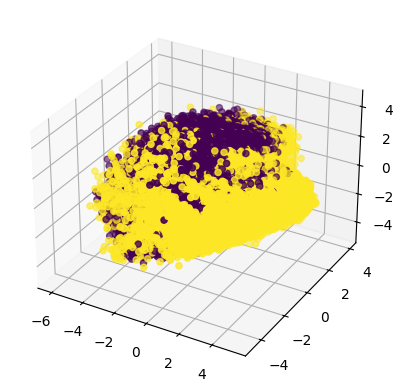

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

pca = PCA(n_components=3)
result = pca.fit_transform(X_train)

ax.scatter(
  xs=result[:,0],
  ys=result[:,1],
  zs=result[:,2],
  c=y_train,
  cmap='viridis'
)

# Visualizing the data in 2D

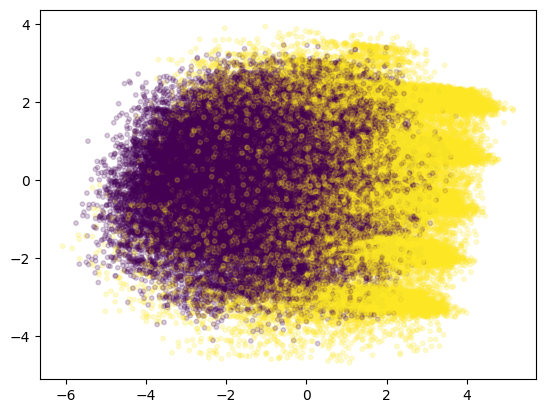

In [ ]:
pca = PCA(n_components=2)
result = pca.fit_transform(X_train)

plt.scatter(
  x=result[:,0],
  y=result[:,1] ,
  c=y_train,
  cmap='viridis',
  alpha=0.2,
  s=10
)

# Classification

# Logistic regression

In [ ]:
logisticRegr = LogisticRegression(random_state=42)

logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
accuracy_score(y_test, y_pred)

0.8765218228189211

# K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier()

param_grid = {
  'n_neighbors': range(1, 20)
}

random_knn = RandomizedSearchCV(knn, param_grid, n_iter=10, cv=5, verbose=2)
random_knn.fit(X_train, y_train)
random_knn.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....................................n_neighbors=13; total time=  17.3s
[CV] END .....................................n_neighbors=13; total time=  12.1s
[CV] END .....................................n_neighbors=13; total time=   8.3s
[CV] END .....................................n_neighbors=13; total time=   7.0s
[CV] END .....................................n_neighbors=13; total time=   8.3s
[CV] END .....................................n_neighbors=11; total time=   7.2s
[CV] END .....................................n_neighbors=11; total time=   8.4s
[CV] END .....................................n_neighbors=11; total time=   8.3s
[CV] END .....................................n_neighbors=11; total time=   7.0s
[CV] END .....................................n_neighbors=11; total time=   8.3s
[CV] END ......................................n_neighbors=2; total time=   7.0s
[CV] END ......................................n

{'n_neighbors': 13}

In [ ]:
y_pred = random_knn.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.9262788123766903

# Decision Tree

In [26]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=42)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9496174390067851

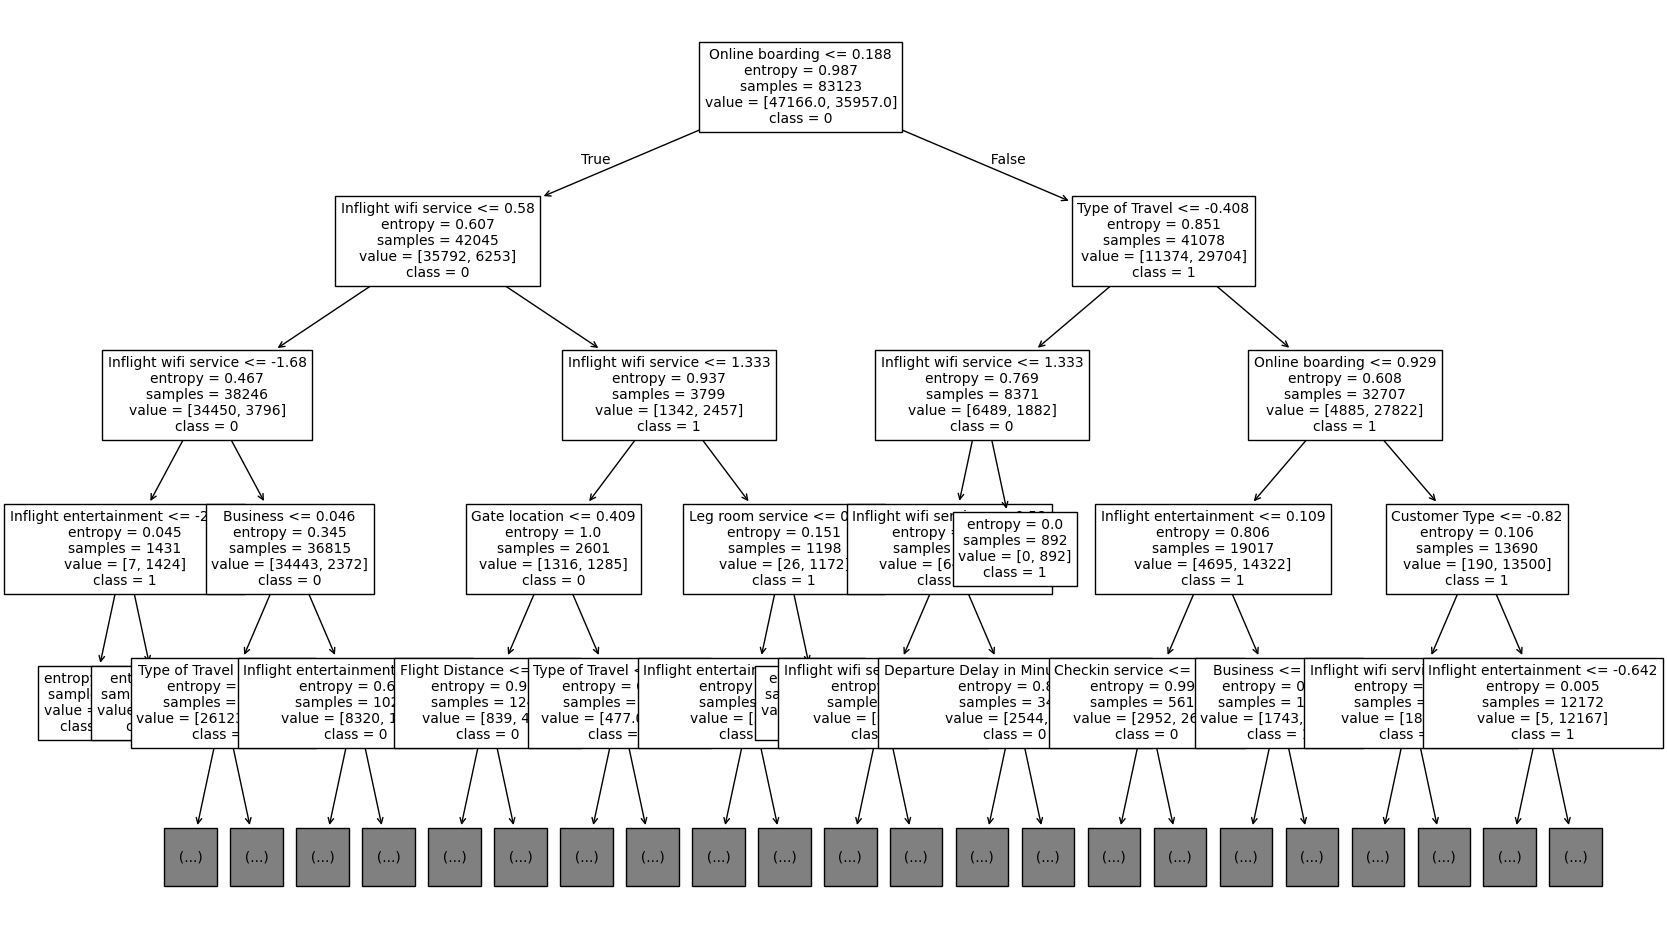

In [29]:
plt.figure(figsize=(20,12))
tree = tree.plot_tree(clf, fontsize=10, feature_names=feature_names, class_names=[str(cls) for cls in clf.classes_], max_depth=4)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     11713
           1       0.94      0.94      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



# Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
  'n_estimators': [50, 100, 150],
  'max_depth': [5, 10, 15],
  'min_samples_split': [2, 5],
  'min_samples_leaf': [1, 2]
}

random_rf = RandomizedSearchCV(rf, param_grid, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_rf.fit(X_train, y_train)
print(f"The best score is {random_rf.best_score_}, with parameters {random_rf.best_params_}")
featimp = pd.Series(random_rf.best_estimator_.feature_importances_, index=feature_names).sort_values(ascending=False)
print(featimp)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best score is 0.9574125250566261, with parameters {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 15}
Online boarding                      0.201621
Inflight wifi service                0.148053
Business                             0.086439
Type of Travel                       0.085017
Eco                                  0.061371
Inflight entertainment               0.055681
Seat comfort                         0.039635
Ease of Online booking               0.038306
Leg room service                     0.035475
Customer Type                        0.033994
On-board service                     0.029957
Cleanliness                          0.025998
Flight Distance                      0.023840
Baggage handling                     0.023500
Age                                  0.023253
Checkin service                      0.019488
Inflight service                     0.018332
Departure/Arrival

In [ ]:
y_pred = random_rf.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.959241614936721

We can see that the importance of the features varies, so the intuition would be that we can select the most important features and train the model again for better accuracy.

## Feature selection

In [ ]:
best_rf = RandomForestClassifier(**random_rf.best_params_,random_state=42)
rfecv = RFECV(estimator=best_rf, step=1, cv=5, scoring="accuracy", min_features_to_select=1, n_jobs=2, verbose=1)
rfecv.fit(X_train, y_train)

Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.


RFECV(cv=5,
      estimator=RandomForestClassifier(max_depth=15, n_estimators=150,
                                       random_state=42),
      n_jobs=2, scoring='accuracy', verbose=1)

In [ ]:
selected_features = feature_names[rfecv.support_]
print(f"Selected features: {list(selected_features)}")
print(f"Optimal number of features: {rfecv.n_features_}")

Selected features: ['Customer Type', 'Age', 'Type of Travel', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Business', 'Eco']
Optimal number of features: 18


In [ ]:
X_train_reduced = rfecv.transform(X_train)
X_test_reduced = rfecv.transform(X_test)

final_rf = RandomForestClassifier(**random_rf.best_params_, random_state=42)
final_rf.fit(X_train_reduced, y_train)
y_pred = final_rf.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9614070545209566

Obtained better results than before. Let's run a larger grid on the selected features.

In [ ]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
  'n_estimators': [50, 100, 150, 200],
  'max_depth': [5, 10, 15, 20, 25],
  'min_samples_split': [2, 5],
  'min_samples_leaf': [1, 2, 4]
}

random_rf = GridSearchCV(rf, param_grid, cv=3, verbose=2, n_jobs=-1)
random_rf.fit(X_train_reduced, y_train)
print(f"The best score is {random_rf.best_score_}, with parameters {random_rf.best_params_}")

Fitting 3 folds for each of 120 candidates, totalling 360 fits
The best score is 0.9615268999477363, with parameters {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}


In [ ]:
y_pred = random_rf.best_estimator_.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9629950435493961

# SVC

In [ ]:
svc = SVC()

param_grid = {
  'C': [0.1, 1, 10],
  'kernel': ['linear', 'rbf'],
  'gamma': ['scale']
}

random_svc = RandomizedSearchCV(svc, param_grid, n_iter=5, cv=3, verbose=2, n_jobs=-1, random_state=42)
random_svc.fit(X_train, y_train)
random_svc.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


{'kernel': 'rbf', 'gamma': 'scale', 'C': 10}

In [ ]:
y_pred = random_svc.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

0.9586160435012752

# AutoML

In [ ]:
automl_settings = {
  "time_budget": 360,  # in seconds
  "metric": "accuracy",
  "task": "classification",
}

automl = AutoML()
automl.fit(X_train, y_train, **automl_settings)

[flaml.automl.logger: 05-13 15:31:02] {1728} INFO - task = classification
[flaml.automl.logger: 05-13 15:31:02] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 05-13 15:31:02] {1838} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 05-13 15:31:02] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']
[flaml.automl.logger: 05-13 15:31:02] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 05-13 15:31:02] {2393} INFO - Estimated sufficient time budget=10415s. Estimated necessary time budget=241s.
[flaml.automl.logger: 05-13 15:31:02] {2442} INFO -  at 0.3s,	estimator lgbm's best error=0.1566,	best estimator lgbm's best error=0.1566
[flaml.automl.logger: 05-13 15:31:02] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 05-13 15:31:03] {2442} INFO -  at 0.3s,	estimator lgbm's best error=0.1566,	best estimator lgbm's best error=0.1566
[flaml.automl.logger

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:31:03] {2442} INFO -  at 0.4s,	estimator lgbm's best error=0.1189,	best estimator lgbm's best error=0.1189
[flaml.automl.logger: 05-13 15:31:03] {2258} INFO - iteration 3, current learner lgbm
[flaml.automl.logger: 05-13 15:31:03] {2442} INFO -  at 0.4s,	estimator lgbm's best error=0.0712,	best estimator lgbm's best error=0.0712
[flaml.automl.logger: 05-13 15:31:03] {2258} INFO - iteration 4, current learner lgbm
[flaml.automl.logger: 05-13 15:31:03] {2442} INFO -  at 0.5s,	estimator lgbm's best error=0.0712,	best estimator lgbm's best error=0.0712
[flaml.automl.logger: 05-13 15:31:03] {2258} INFO - iteration 5, current learner lgbm
[flaml.automl.logger: 05-13 15:31:03] {2442} INFO -  at 0.5s,	estimator lgbm's best error=0.0651,	best estimator lgbm's best error=0.0651
[flaml.automl.logger: 05-13 15:31:03] {2258} INFO - iteration 6, current learner lgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[flaml.automl.logger: 05-13 15:31:03] {2442} INFO -  at 0.6s,	estimator lgbm's best error=0.0651,	best estimator lgbm's best error=0.0651
[flaml.automl.logger: 05-13 15:31:03] {2258} INFO - iteration 7, current learner lgbm
[flaml.automl.logger: 05-13 15:31:03] {2442} INFO -  at 0.7s,	estimator lgbm's best error=0.0651,	best estimator lgbm's best error=0.0651
[flaml.automl.logger: 05-13 15:31:03] {2258} INFO - iteration 8, current learner lgbm
[flaml.automl.logger: 05-13 15:31:03] {2442} INFO -  at 0.8s,	estimator lgbm's best error=0.0603,	best estimator lgbm's best error=0.0603
[flaml.automl.logger: 05-13 15:31:03] {2258} INFO - iteration 9, current learner sgd


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
INFO:flaml.tune.searcher.

[flaml.automl.logger: 05-13 15:31:03] {2442} INFO -  at 1.0s,	estimator sgd's best error=0.1329,	best estimator lgbm's best error=0.0603
[flaml.automl.logger: 05-13 15:31:03] {2258} INFO - iteration 10, current learner xgboost
[flaml.automl.logger: 05-13 15:31:03] {2442} INFO -  at 1.2s,	estimator xgboost's best error=0.1566,	best estimator lgbm's best error=0.0603
[flaml.automl.logger: 05-13 15:31:03] {2258} INFO - iteration 11, current learner xgboost
[flaml.automl.logger: 05-13 15:31:03] {2442} INFO -  at 1.2s,	estimator xgboost's best error=0.1566,	best estimator lgbm's best error=0.0603
[flaml.automl.logger: 05-13 15:31:03] {2258} INFO - iteration 12, current learner xgboost
[flaml.automl.logger: 05-13 15:31:03] {2442} INFO -  at 1.2s,	estimator xgboost's best error=0.1189,	best estimator lgbm's best error=0.0603
[flaml.automl.logger: 05-13 15:31:03] {2258} INFO - iteration 13, current learner xgboost
[flaml.automl.logger: 05-13 15:31:04] {2442} INFO -  at 1.3s,	estimator xgboost'

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:31:04] {2442} INFO -  at 2.0s,	estimator lgbm's best error=0.0427,	best estimator lgbm's best error=0.0427
[flaml.automl.logger: 05-13 15:31:04] {2258} INFO - iteration 18, current learner xgboost
[flaml.automl.logger: 05-13 15:31:04] {2442} INFO -  at 2.0s,	estimator xgboost's best error=0.0838,	best estimator lgbm's best error=0.0427
[flaml.automl.logger: 05-13 15:31:04] {2258} INFO - iteration 19, current learner extra_tree
[flaml.automl.logger: 05-13 15:31:04] {2442} INFO -  at 2.1s,	estimator extra_tree's best error=0.1834,	best estimator lgbm's best error=0.0427


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:31:04] {2258} INFO - iteration 20, current learner extra_tree
[flaml.automl.logger: 05-13 15:31:04] {2442} INFO -  at 2.2s,	estimator extra_tree's best error=0.1458,	best estimator lgbm's best error=0.0427
[flaml.automl.logger: 05-13 15:31:04] {2258} INFO - iteration 21, current learner rf
[flaml.automl.logger: 05-13 15:31:04] {2442} INFO -  at 2.2s,	estimator rf's best error=0.1538,	best estimator lgbm's best error=0.0427
[flaml.automl.logger: 05-13 15:31:04] {2258} INFO - iteration 22, current learner rf
[flaml.automl.logger: 05-13 15:31:05] {2442} INFO -  at 2.3s,	estimator rf's best error=0.1005,	best estimator lgbm's best error=0.0427
[flaml.automl.logger: 05-13 15:31:05] {2258} INFO - iteration 23, current learner rf
[flaml.automl.logger: 05-13 15:31:05] {2442} INFO -  at 2.4s,	estimator rf's best error=0.1005,	best estimator lgbm's best error=0.0427
[flaml.automl.logger: 05-13 15:31:05] {2258} INFO - iteration 24, current learner rf
[flaml.automl.l

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:31:08] {2442} INFO -  at 6.0s,	estimator lgbm's best error=0.0427,	best estimator lgbm's best error=0.0427
[flaml.automl.logger: 05-13 15:31:08] {2258} INFO - iteration 32, current learner lgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:31:09] {2442} INFO -  at 6.4s,	estimator lgbm's best error=0.0427,	best estimator lgbm's best error=0.0427
[flaml.automl.logger: 05-13 15:31:09] {2258} INFO - iteration 33, current learner lgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:31:09] {2442} INFO -  at 6.8s,	estimator lgbm's best error=0.0427,	best estimator lgbm's best error=0.0427
[flaml.automl.logger: 05-13 15:31:09] {2258} INFO - iteration 34, current learner extra_tree
[flaml.automl.logger: 05-13 15:31:09] {2442} INFO -  at 6.9s,	estimator extra_tree's best error=0.1259,	best estimator lgbm's best error=0.0427
[flaml.automl.logger: 05-13 15:31:09] {2258} INFO - iteration 35, current learner lgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:31:11] {2442} INFO -  at 8.6s,	estimator lgbm's best error=0.0363,	best estimator lgbm's best error=0.0363
[flaml.automl.logger: 05-13 15:31:11] {2258} INFO - iteration 36, current learner rf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:31:11] {2442} INFO -  at 8.8s,	estimator rf's best error=0.0897,	best estimator lgbm's best error=0.0363
[flaml.automl.logger: 05-13 15:31:11] {2258} INFO - iteration 37, current learner extra_tree
[flaml.automl.logger: 05-13 15:31:11] {2442} INFO -  at 8.8s,	estimator extra_tree's best error=0.1013,	best estimator lgbm's best error=0.0363
[flaml.automl.logger: 05-13 15:31:11] {2258} INFO - iteration 38, current learner extra_tree
[flaml.automl.logger: 05-13 15:31:11] {2442} INFO -  at 9.0s,	estimator extra_tree's best error=0.0830,	best estimator lgbm's best error=0.0363
[flaml.automl.logger: 05-13 15:31:11] {2258} INFO - iteration 39, current learner extra_tree
[flaml.automl.logger: 05-13 15:31:11] {2442} INFO -  at 9.0s,	estimator extra_tree's best error=0.0830,	best estimator lgbm's best error=0.0363
[flaml.automl.logger: 05-13 15:31:11] {2258} INFO - iteration 40, current learner xgboost
[flaml.automl.logger: 05-13 15:31:11] {2442} INFO -  at 9.1s,	e

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:31:14] {2442} INFO -  at 11.6s,	estimator lgbm's best error=0.0363,	best estimator lgbm's best error=0.0363
[flaml.automl.logger: 05-13 15:31:14] {2258} INFO - iteration 44, current learner extra_tree
[flaml.automl.logger: 05-13 15:31:14] {2442} INFO -  at 11.7s,	estimator extra_tree's best error=0.0603,	best estimator lgbm's best error=0.0363
[flaml.automl.logger: 05-13 15:31:14] {2258} INFO - iteration 45, current learner extra_tree


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:31:14] {2442} INFO -  at 11.9s,	estimator extra_tree's best error=0.0556,	best estimator lgbm's best error=0.0363
[flaml.automl.logger: 05-13 15:31:14] {2258} INFO - iteration 46, current learner xgboost
[flaml.automl.logger: 05-13 15:31:14] {2442} INFO -  at 11.9s,	estimator xgboost's best error=0.0640,	best estimator lgbm's best error=0.0363
[flaml.automl.logger: 05-13 15:31:14] {2258} INFO - iteration 47, current learner rf
[flaml.automl.logger: 05-13 15:31:14] {2442} INFO -  at 12.0s,	estimator rf's best error=0.0827,	best estimator lgbm's best error=0.0363
[flaml.automl.logger: 05-13 15:31:14] {2258} INFO - iteration 48, current learner extra_tree
[flaml.automl.logger: 05-13 15:31:14] {2442} INFO -  at 12.2s,	estimator extra_tree's best error=0.0556,	best estimator lgbm's best error=0.0363
[flaml.automl.logger: 05-13 15:31:14] {2258} INFO - iteration 49, current learner lgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:31:16] {2442} INFO -  at 14.0s,	estimator lgbm's best error=0.0363,	best estimator lgbm's best error=0.0363
[flaml.automl.logger: 05-13 15:31:16] {2258} INFO - iteration 50, current learner xgboost
[flaml.automl.logger: 05-13 15:31:16] {2442} INFO -  at 14.1s,	estimator xgboost's best error=0.0540,	best estimator lgbm's best error=0.0363
[flaml.automl.logger: 05-13 15:31:16] {2258} INFO - iteration 51, current learner extra_tree


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:31:17] {2442} INFO -  at 14.4s,	estimator extra_tree's best error=0.0556,	best estimator lgbm's best error=0.0363
[flaml.automl.logger: 05-13 15:31:17] {2258} INFO - iteration 52, current learner xgboost
[flaml.automl.logger: 05-13 15:31:17] {2442} INFO -  at 14.5s,	estimator xgboost's best error=0.0540,	best estimator lgbm's best error=0.0363
[flaml.automl.logger: 05-13 15:31:17] {2258} INFO - iteration 53, current learner rf
[flaml.automl.logger: 05-13 15:31:17] {2442} INFO -  at 14.7s,	estimator rf's best error=0.0678,	best estimator lgbm's best error=0.0363
[flaml.automl.logger: 05-13 15:31:17] {2258} INFO - iteration 54, current learner rf
[flaml.automl.logger: 05-13 15:31:17] {2442} INFO -  at 14.8s,	estimator rf's best error=0.0678,	best estimator lgbm's best error=0.0363
[flaml.automl.logger: 05-13 15:31:17] {2258} INFO - iteration 55, current learner lgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:31:20] {2442} INFO -  at 18.1s,	estimator lgbm's best error=0.0354,	best estimator lgbm's best error=0.0354
[flaml.automl.logger: 05-13 15:31:20] {2258} INFO - iteration 56, current learner xgboost


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:31:21] {2442} INFO -  at 18.3s,	estimator xgboost's best error=0.0518,	best estimator lgbm's best error=0.0354
[flaml.automl.logger: 05-13 15:31:21] {2258} INFO - iteration 57, current learner rf
[flaml.automl.logger: 05-13 15:31:21] {2442} INFO -  at 18.6s,	estimator rf's best error=0.0678,	best estimator lgbm's best error=0.0354
[flaml.automl.logger: 05-13 15:31:21] {2258} INFO - iteration 58, current learner rf
[flaml.automl.logger: 05-13 15:31:21] {2442} INFO -  at 18.8s,	estimator rf's best error=0.0593,	best estimator lgbm's best error=0.0354
[flaml.automl.logger: 05-13 15:31:21] {2258} INFO - iteration 59, current learner rf
[flaml.automl.logger: 05-13 15:31:21] {2442} INFO -  at 18.9s,	estimator rf's best error=0.0593,	best estimator lgbm's best error=0.0354
[flaml.automl.logger: 05-13 15:31:21] {2258} INFO - iteration 60, current learner lgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:31:23] {2442} INFO -  at 20.7s,	estimator lgbm's best error=0.0354,	best estimator lgbm's best error=0.0354
[flaml.automl.logger: 05-13 15:31:23] {2258} INFO - iteration 61, current learner xgboost
[flaml.automl.logger: 05-13 15:31:23] {2442} INFO -  at 20.9s,	estimator xgboost's best error=0.0510,	best estimator lgbm's best error=0.0354
[flaml.automl.logger: 05-13 15:31:23] {2258} INFO - iteration 62, current learner lgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:31:24] {2442} INFO -  at 21.7s,	estimator lgbm's best error=0.0354,	best estimator lgbm's best error=0.0354
[flaml.automl.logger: 05-13 15:31:24] {2258} INFO - iteration 63, current learner xgboost
[flaml.automl.logger: 05-13 15:31:24] {2442} INFO -  at 21.7s,	estimator xgboost's best error=0.0510,	best estimator lgbm's best error=0.0354
[flaml.automl.logger: 05-13 15:31:24] {2258} INFO - iteration 64, current learner xgboost


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:31:24] {2442} INFO -  at 21.9s,	estimator xgboost's best error=0.0510,	best estimator lgbm's best error=0.0354
[flaml.automl.logger: 05-13 15:31:24] {2258} INFO - iteration 65, current learner lgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:31:28] {2442} INFO -  at 26.2s,	estimator lgbm's best error=0.0338,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:31:28] {2258} INFO - iteration 66, current learner rf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:31:29] {2442} INFO -  at 26.5s,	estimator rf's best error=0.0546,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:31:29] {2258} INFO - iteration 67, current learner xgboost
[flaml.automl.logger: 05-13 15:31:29] {2442} INFO -  at 26.5s,	estimator xgboost's best error=0.0510,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:31:29] {2258} INFO - iteration 68, current learner rf
[flaml.automl.logger: 05-13 15:31:29] {2442} INFO -  at 26.7s,	estimator rf's best error=0.0546,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:31:29] {2258} INFO - iteration 69, current learner lgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:31:37] {2442} INFO -  at 35.0s,	estimator lgbm's best error=0.0338,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:31:37] {2258} INFO - iteration 70, current learner rf
[flaml.automl.logger: 05-13 15:31:38] {2442} INFO -  at 35.5s,	estimator rf's best error=0.0546,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:31:38] {2258} INFO - iteration 71, current learner extra_tree
[flaml.automl.logger: 05-13 15:31:38] {2442} INFO -  at 35.7s,	estimator extra_tree's best error=0.0512,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:31:38] {2258} INFO - iteration 72, current learner xgboost
[flaml.automl.logger: 05-13 15:31:38] {2442} INFO -  at 35.8s,	estimator xgboost's best error=0.0510,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:31:38] {2258} INFO - iteration 73, current learner extra_tree
[flaml.automl.logger: 05-13 15:31:38] {2442} INFO -  at 36.0s,	estimator ext

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:31:41] {2442} INFO -  at 39.2s,	estimator lgbm's best error=0.0338,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:31:41] {2258} INFO - iteration 77, current learner lgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:31:48] {2442} INFO -  at 46.0s,	estimator lgbm's best error=0.0338,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:31:48] {2258} INFO - iteration 78, current learner extra_tree


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:31:49] {2442} INFO -  at 46.4s,	estimator extra_tree's best error=0.0492,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:31:49] {2258} INFO - iteration 79, current learner xgb_limitdepth
[flaml.automl.logger: 05-13 15:31:49] {2442} INFO -  at 46.4s,	estimator xgb_limitdepth's best error=0.0574,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:31:49] {2258} INFO - iteration 80, current learner xgb_limitdepth
[flaml.automl.logger: 05-13 15:31:49] {2442} INFO -  at 46.5s,	estimator xgb_limitdepth's best error=0.0574,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:31:49] {2258} INFO - iteration 81, current learner xgb_limitdepth
[flaml.automl.logger: 05-13 15:31:49] {2442} INFO -  at 46.6s,	estimator xgb_limitdepth's best error=0.0527,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:31:49] {2258} INFO - iteration 82, current learner xgb_limitdepth
[flaml.automl.logger

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:31:56] {2442} INFO -  at 53.6s,	estimator lgbm's best error=0.0338,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:31:56] {2258} INFO - iteration 97, current learner sgd
[flaml.automl.logger: 05-13 15:31:56] {2442} INFO -  at 53.8s,	estimator sgd's best error=0.1247,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:31:56] {2258} INFO - iteration 98, current learner xgboost
[flaml.automl.logger: 05-13 15:31:56] {2442} INFO -  at 54.1s,	estimator xgboost's best error=0.0457,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:31:56] {2258} INFO - iteration 99, current learner xgboost
[flaml.automl.logger: 05-13 15:31:57] {2442} INFO -  at 54.7s,	estimator xgboost's best error=0.0457,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:31:57] {2258} INFO - iteration 100, current learner xgboost
[flaml.automl.logger: 05-13 15:31:59] {2442} INFO -  at 56.3s,	estimator xgboost's

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:32:11] {2442} INFO -  at 68.5s,	estimator lgbm's best error=0.0338,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:32:11] {2258} INFO - iteration 105, current learner xgboost
[flaml.automl.logger: 05-13 15:32:13] {2442} INFO -  at 70.6s,	estimator xgboost's best error=0.0352,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:32:13] {2258} INFO - iteration 106, current learner xgboost
[flaml.automl.logger: 05-13 15:32:17] {2442} INFO -  at 74.5s,	estimator xgboost's best error=0.0352,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:32:17] {2258} INFO - iteration 107, current learner xgboost
[flaml.automl.logger: 05-13 15:32:17] {2442} INFO -  at 75.0s,	estimator xgboost's best error=0.0352,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:32:17] {2258} INFO - iteration 108, current learner extra_tree
[flaml.automl.logger: 05-13 15:32:17] {2442} INFO -  at 75.3s,	estim

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:32:30] {2442} INFO -  at 87.6s,	estimator lgbm's best error=0.0338,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:32:30] {2258} INFO - iteration 113, current learner xgb_limitdepth


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:32:30] {2442} INFO -  at 87.8s,	estimator xgb_limitdepth's best error=0.0403,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:32:30] {2258} INFO - iteration 114, current learner extra_tree
[flaml.automl.logger: 05-13 15:32:30] {2442} INFO -  at 88.2s,	estimator extra_tree's best error=0.0480,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:32:30] {2258} INFO - iteration 115, current learner sgd
[flaml.automl.logger: 05-13 15:32:31] {2442} INFO -  at 88.4s,	estimator sgd's best error=0.1247,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:32:31] {2258} INFO - iteration 116, current learner rf
[flaml.automl.logger: 05-13 15:32:31] {2442} INFO -  at 88.6s,	estimator rf's best error=0.0528,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:32:31] {2258} INFO - iteration 117, current learner lgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:32:44] {2442} INFO -  at 101.4s,	estimator lgbm's best error=0.0338,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:32:44] {2258} INFO - iteration 118, current learner xgb_limitdepth
[flaml.automl.logger: 05-13 15:32:45] {2442} INFO -  at 102.3s,	estimator xgb_limitdepth's best error=0.0355,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:32:45] {2258} INFO - iteration 119, current learner xgb_limitdepth
[flaml.automl.logger: 05-13 15:32:45] {2442} INFO -  at 102.8s,	estimator xgb_limitdepth's best error=0.0355,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:32:45] {2258} INFO - iteration 120, current learner xgboost
[flaml.automl.logger: 05-13 15:32:47] {2442} INFO -  at 104.7s,	estimator xgboost's best error=0.0352,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:32:47] {2258} INFO - iteration 121, current learner xgb_limitdepth
[flaml.automl.logger: 05-13 15:3

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:32:56] {2442} INFO -  at 113.6s,	estimator lgbm's best error=0.0338,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:32:56] {2258} INFO - iteration 127, current learner lgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:32:58] {2442} INFO -  at 115.6s,	estimator lgbm's best error=0.0338,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:32:58] {2258} INFO - iteration 128, current learner lgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:33:18] {2442} INFO -  at 135.4s,	estimator lgbm's best error=0.0338,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:33:18] {2258} INFO - iteration 129, current learner rf
[flaml.automl.logger: 05-13 15:33:18] {2442} INFO -  at 136.0s,	estimator rf's best error=0.0493,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:33:18] {2258} INFO - iteration 130, current learner extra_tree
[flaml.automl.logger: 05-13 15:33:19] {2442} INFO -  at 136.5s,	estimator extra_tree's best error=0.0471,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:33:19] {2258} INFO - iteration 131, current learner xgboost
[flaml.automl.logger: 05-13 15:33:19] {2442} INFO -  at 137.0s,	estimator xgboost's best error=0.0352,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:33:19] {2258} INFO - iteration 132, current learner xgboost
[flaml.automl.logger: 05-13 15:33:29] {2442} INFO -  at 147.0s,	estimat

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 05-13 15:33:31] {2442} INFO -  at 149.0s,	estimator lrl1's best error=0.1242,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:33:31] {2258} INFO - iteration 137, current learner lrl1
[flaml.automl.logger: 05-13 15:33:32] {2442} INFO -  at 149.3s,	estimator lrl1's best error=0.1242,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:33:32] {2258} INFO - iteration 138, current learner lrl1
[flaml.automl.logger: 05-13 15:33:32] {2442} INFO -  at 150.1s,	estimator lrl1's best error=0.1242,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:33:32] {2258} INFO - iteration 139, current learner lrl1
[flaml.automl.logger: 05-13 15:33:40] {2442} INFO -  at 157.5s,	estimator lrl1's best error=0.1242,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:33:40] {2258} INFO - iteration 140, current learner lgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:33:43] {2442} INFO -  at 160.9s,	estimator lgbm's best error=0.0338,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:33:43] {2258} INFO - iteration 141, current learner lrl1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:33:50] {2442} INFO -  at 167.8s,	estimator lrl1's best error=0.1242,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:33:50] {2258} INFO - iteration 142, current learner xgboost
[flaml.automl.logger: 05-13 15:33:51] {2442} INFO -  at 169.1s,	estimator xgboost's best error=0.0352,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:33:51] {2258} INFO - iteration 143, current learner lrl1
[flaml.automl.logger: 05-13 15:33:53] {2442} INFO -  at 170.5s,	estimator lrl1's best error=0.1242,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:33:53] {2258} INFO - iteration 144, current learner xgboost
[flaml.automl.logger: 05-13 15:33:55] {2442} INFO -  at 173.1s,	estimator xgboost's best error=0.0352,	best estimator lgbm's best error=0.0338
[flaml.automl.logger: 05-13 15:33:55] {2258} INFO - iteration 145, current learner lrl1
[flaml.automl.logger: 05-13 15:33:55] {2470} INFO - stop trying learner lrl1

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:34:08] {2442} INFO -  at 185.8s,	estimator lgbm's best error=0.0328,	best estimator lgbm's best error=0.0328
[flaml.automl.logger: 05-13 15:34:08] {2258} INFO - iteration 149, current learner lgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:34:15] {2442} INFO -  at 193.1s,	estimator lgbm's best error=0.0328,	best estimator lgbm's best error=0.0328
[flaml.automl.logger: 05-13 15:34:15] {2258} INFO - iteration 150, current learner lgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:34:26] {2442} INFO -  at 203.6s,	estimator lgbm's best error=0.0328,	best estimator lgbm's best error=0.0328
[flaml.automl.logger: 05-13 15:34:26] {2258} INFO - iteration 151, current learner lgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:35:19] {2442} INFO -  at 256.4s,	estimator lgbm's best error=0.0328,	best estimator lgbm's best error=0.0328
[flaml.automl.logger: 05-13 15:35:19] {2258} INFO - iteration 152, current learner lgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:35:20] {2442} INFO -  at 258.2s,	estimator lgbm's best error=0.0328,	best estimator lgbm's best error=0.0328
[flaml.automl.logger: 05-13 15:35:20] {2258} INFO - iteration 153, current learner rf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:35:21] {2442} INFO -  at 258.7s,	estimator rf's best error=0.0481,	best estimator lgbm's best error=0.0328
[flaml.automl.logger: 05-13 15:35:21] {2258} INFO - iteration 154, current learner extra_tree
[flaml.automl.logger: 05-13 15:35:21] {2442} INFO -  at 259.0s,	estimator extra_tree's best error=0.0469,	best estimator lgbm's best error=0.0328
[flaml.automl.logger: 05-13 15:35:21] {2258} INFO - iteration 155, current learner xgboost
[flaml.automl.logger: 05-13 15:35:25] {2442} INFO -  at 262.3s,	estimator xgboost's best error=0.0352,	best estimator lgbm's best error=0.0328
[flaml.automl.logger: 05-13 15:35:25] {2258} INFO - iteration 156, current learner lgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:35:43] {2442} INFO -  at 280.8s,	estimator lgbm's best error=0.0328,	best estimator lgbm's best error=0.0328
[flaml.automl.logger: 05-13 15:35:43] {2258} INFO - iteration 157, current learner lgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:35:47] {2442} INFO -  at 284.4s,	estimator lgbm's best error=0.0328,	best estimator lgbm's best error=0.0328
[flaml.automl.logger: 05-13 15:35:47] {2258} INFO - iteration 158, current learner sgd


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:35:47] {2442} INFO -  at 285.0s,	estimator sgd's best error=0.1247,	best estimator lgbm's best error=0.0328
[flaml.automl.logger: 05-13 15:35:47] {2258} INFO - iteration 159, current learner xgboost
[flaml.automl.logger: 05-13 15:35:58] {2442} INFO -  at 295.9s,	estimator xgboost's best error=0.0352,	best estimator lgbm's best error=0.0328
[flaml.automl.logger: 05-13 15:35:58] {2258} INFO - iteration 160, current learner rf
[flaml.automl.logger: 05-13 15:35:59] {2442} INFO -  at 296.9s,	estimator rf's best error=0.0481,	best estimator lgbm's best error=0.0328
[flaml.automl.logger: 05-13 15:35:59] {2258} INFO - iteration 161, current learner xgboost
[flaml.automl.logger: 05-13 15:36:00] {2442} INFO -  at 297.3s,	estimator xgboost's best error=0.0352,	best estimator lgbm's best error=0.0328
[flaml.automl.logger: 05-13 15:36:00] {2258} INFO - iteration 162, current learner extra_tree
[flaml.automl.logger: 05-13 15:36:00] {2442} INFO -  at 297.8s,	estimator e

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:36:39] {2442} INFO -  at 336.9s,	estimator lgbm's best error=0.0328,	best estimator lgbm's best error=0.0328
[flaml.automl.logger: 05-13 15:36:39] {2258} INFO - iteration 164, current learner xgboost
[flaml.automl.logger: 05-13 15:36:43] {2442} INFO -  at 340.6s,	estimator xgboost's best error=0.0349,	best estimator lgbm's best error=0.0328
[flaml.automl.logger: 05-13 15:36:43] {2258} INFO - iteration 165, current learner sgd
[flaml.automl.logger: 05-13 15:36:43] {2442} INFO -  at 340.8s,	estimator sgd's best error=0.1247,	best estimator lgbm's best error=0.0328
[flaml.automl.logger: 05-13 15:36:43] {2258} INFO - iteration 166, current learner xgb_limitdepth
[flaml.automl.logger: 05-13 15:36:44] {2442} INFO -  at 341.6s,	estimator xgb_limitdepth's best error=0.0352,	best estimator lgbm's best error=0.0328
[flaml.automl.logger: 05-13 15:36:44] {2258} INFO - iteration 167, current learner lgbm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:36:47] {2442} INFO -  at 344.3s,	estimator lgbm's best error=0.0328,	best estimator lgbm's best error=0.0328
[flaml.automl.logger: 05-13 15:36:47] {2258} INFO - iteration 168, current learner extra_tree


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:36:47] {2442} INFO -  at 344.6s,	estimator extra_tree's best error=0.0469,	best estimator lgbm's best error=0.0328
[flaml.automl.logger: 05-13 15:36:47] {2258} INFO - iteration 169, current learner xgb_limitdepth
[flaml.automl.logger: 05-13 15:36:55] {2442} INFO -  at 352.4s,	estimator xgb_limitdepth's best error=0.0352,	best estimator lgbm's best error=0.0328
[flaml.automl.logger: 05-13 15:36:55] {2258} INFO - iteration 170, current learner sgd
[flaml.automl.logger: 05-13 15:36:55] {2442} INFO -  at 352.6s,	estimator sgd's best error=0.1242,	best estimator lgbm's best error=0.0328
[flaml.automl.logger: 05-13 15:36:55] {2258} INFO - iteration 171, current learner xgboost
[flaml.automl.logger: 05-13 15:36:57] {2442} INFO -  at 354.5s,	estimator xgboost's best error=0.0349,	best estimator lgbm's best error=0.0328
[flaml.automl.logger: 05-13 15:36:57] {2258} INFO - iteration 172, current learner rf
[flaml.automl.logger: 05-13 15:36:57] {2442} INFO -  at 354.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[flaml.automl.logger: 05-13 15:37:13] {2685} INFO - retrain lgbm for 10.0s
[flaml.automl.logger: 05-13 15:37:13] {2688} INFO - retrained model: LGBMClassifier(colsample_bytree=np.float64(0.6578347391758362),
               learning_rate=np.float64(0.04179074535827166), max_bin=1023,
               min_child_samples=4, n_estimators=589, n_jobs=-1, num_leaves=82,
               reg_alpha=np.float64(0.007704104902643929),
               reg_lambda=np.float64(0.020229013206102948), verbose=-1)
[flaml.automl.logger: 05-13 15:37:13] {1985} INFO - fit succeeded
[flaml.automl.logger: 05-13 15:37:13] {1986} INFO - Time taken to find the best model: 185.84344339370728


In [ ]:
automl.model.estimator

LGBMClassifier(colsample_bytree=np.float64(0.6578347391758362),
               learning_rate=np.float64(0.04179074535827166), max_bin=1023,
               min_child_samples=4, n_estimators=589, n_jobs=-1, num_leaves=82,
               reg_alpha=np.float64(0.007704104902643929),
               reg_lambda=np.float64(0.020229013206102948), verbose=-1)

In [ ]:
y_pred = automl.predict(X_test)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0.9644867908185362

Obtained the biggest accuracy with the LGBM Classifier.

# Neural Networks

In [ ]:
mlp = MLPClassifier(
  hidden_layer_sizes=(128, 64, 32),
  activation='relu',
  solver='adam',
  alpha=0.01,
  learning_rate='adaptive',
  max_iter=500,
  random_state=42,
  verbose=True
)

mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy_score(y_test, y_pred)
# 0.951

Iteration 1, loss = 0.21910515
Iteration 2, loss = 0.13868218
Iteration 3, loss = 0.11942933
Iteration 4, loss = 0.11038924
Iteration 5, loss = 0.10399701
Iteration 6, loss = 0.09988936
Iteration 7, loss = 0.09823594
Iteration 8, loss = 0.09499649
Iteration 9, loss = 0.09383639
Iteration 10, loss = 0.09179084
Iteration 11, loss = 0.08972395
Iteration 12, loss = 0.08822498
Iteration 13, loss = 0.08760114
Iteration 14, loss = 0.08616526
Iteration 15, loss = 0.08473196
Iteration 16, loss = 0.08386486
Iteration 17, loss = 0.08386714
Iteration 18, loss = 0.08205368
Iteration 19, loss = 0.08090841
Iteration 20, loss = 0.08105972
Iteration 21, loss = 0.08004471
Iteration 22, loss = 0.07841612
Iteration 23, loss = 0.07889261
Iteration 24, loss = 0.07786233
Iteration 25, loss = 0.07785483
Iteration 26, loss = 0.07632944
Iteration 27, loss = 0.07641383
Iteration 28, loss = 0.07531691
Iteration 29, loss = 0.07499726
Iteration 30, loss = 0.07414442
Iteration 31, loss = 0.07358962
Iteration 32, los

0.9516385159520716

In [ ]:
param_grid = {
  'hidden_layer_sizes': [(256, 128, 64, 32), (128, 64, 32)],
  'activation': ['relu', 'tanh'],
  'alpha': [0.0001, 0.001, 0.01],
  'solver': ['adam'],
  'learning_rate': ['adaptive'],
  'early_stopping': [True]
}

mlp = MLPClassifier(max_iter=500, random_state=42)

grid_search = GridSearchCV(
  estimator=mlp,
  param_grid=param_grid,
  cv=5,
  scoring='accuracy',
  verbose=2,
  n_jobs=-1
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=500, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'early_stopping': [True],
                         'hidden_layer_sizes': [(256, 128, 64, 32),
                                                (128, 64, 32)],
                         'learning_rate': ['adaptive'], 'solver': ['adam']},
             scoring='accuracy', verbose=2)

In [ ]:
grid_search.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'early_stopping': True,
 'hidden_layer_sizes': (256, 128, 64, 32),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [ ]:
best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)
accuracy_score(y_test, y_pred)

0.9580867138251288

# Improving LGBM

In [ ]:
lgbm = LGBMClassifier(random_state=42)

param_grid = {
  'n_estimators': [250, 300],
  'max_depth': [5, 10, 15, -1],
  'learning_rate': [0.01, 0.1],
  'num_leaves': [31, 41],
  'min_child_samples': [5, 10, 15],
  'reg_alpha': [0, 0.1],
  'reg_lambda': [0, 0.1],
}

random_lgbm = GridSearchCV(
  estimator=lgbm,
  param_grid=param_grid,
  scoring='accuracy',
  cv=5,
  verbose=2,
  n_jobs=-1,
)

random_lgbm.fit(X_train, y_train)
random_lgbm.best_params_

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


{'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 10,
 'n_estimators': 300,
 'num_leaves': 41,
 'reg_alpha': 0.1,
 'reg_lambda': 0.1}

In [ ]:
y_pred = random_lgbm.best_estimator_.predict(X_test)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0.9640055820220393